# Desicion Tree

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [214]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [215]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [216]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

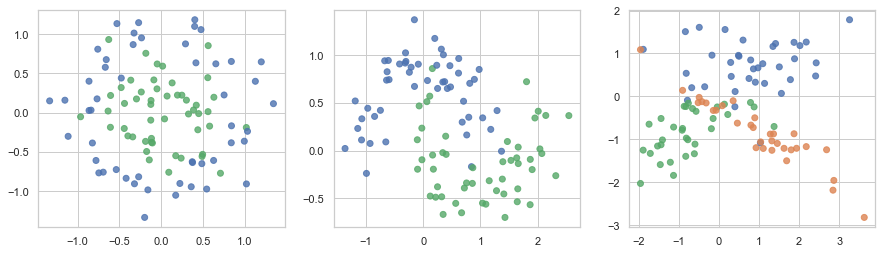

In [217]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [218]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

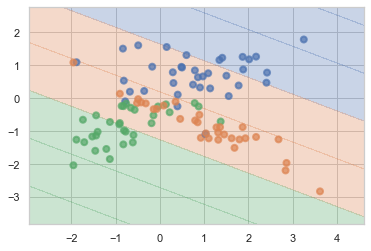

In [219]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [221]:
X1, y1= datasets[0]
X2, y2 = datasets[1]
X3, y3 = datasets[2]
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X1, y1)
X_train2, X_test2 , y_train2, y_test2 = train_test_split(X2, y2)
X_train3, X_test3 , y_train3, y_test3 = train_test_split(X3, y3)

Accuracy на трейне  в первом датасете равно:  1.0


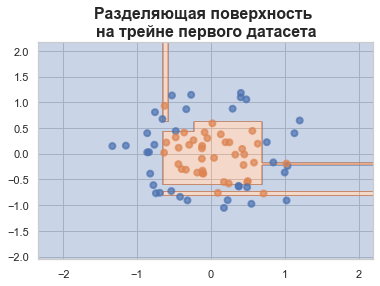

In [222]:
clf = DecisionTreeClassifier(random_state=42).fit(X_train1, y_train1)
train_pred1 = clf.predict(X_train1)
accuracy_train1 = accuracy_score(y_train1, train_pred1)
print("Accuracy на трейне  в первом датасете равно: ", accuracy_train1 )
plot_surface(clf, X_train1, y_train1)
plt.title("Разделяющая поверхность \nна трейне первого датасета", fontsize=16, fontweight = 'bold');

Accuracy на тесте  в первом датасете равно:  0.84


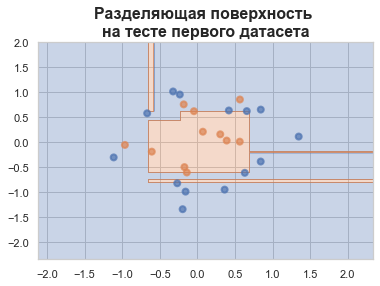

In [223]:
test_pred1 = clf.predict(X_test1)
accuracy_test1 = accuracy_score(y_test1, test_pred1)
print("Accuracy на тесте  в первом датасете равно: ",accuracy_test1)
accuracy_diff = accuracy_train1 - accuracy_test1
plot_surface(clf, X_test1, y_test1)
plt.title("Разделяющая поверхность \nна тесте первого датасета", fontsize=16, fontweight = 'bold');



Accuracy на трейне второго датасета равно 1.0


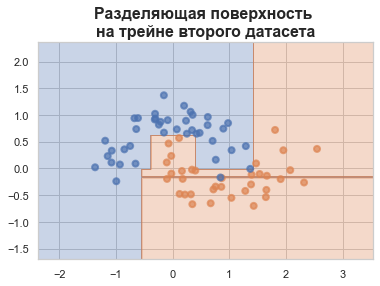

In [224]:
clf = DecisionTreeClassifier(random_state=42).fit(X_train2, y_train2)
train_pred2 = clf.predict(X_train2)
print("Accuracy на трейне второго датасета равно", accuracy_score(y_train2, train_pred2))
plot_surface(clf, X_train2, y_train2)
plt.title("Разделяющая поверхность \nна трейне второго датасета", fontsize=16, fontweight = 'bold');

Accuracy на тесте второго датасета равно 0.96


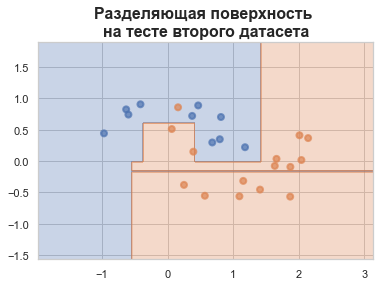

In [225]:
plot_surface(clf, X_test2, y_test2)
test_pred2 = clf.predict(X_test2)
print("Accuracy на тесте второго датасета равно", accuracy_score(y_test2, test_pred2))
plt.title("Разделяющая поверхность \nна тесте второго датасета", fontsize=16, fontweight = 'bold');

Accuracy на трейне второго датасета равно 1.0


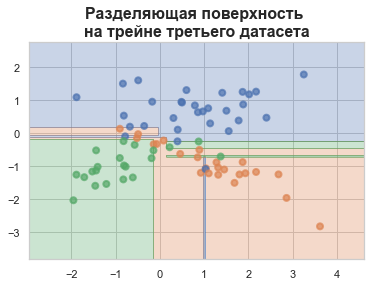

In [226]:
clf = DecisionTreeClassifier(random_state=42).fit(X_train3, y_train3)
train_pred3 = clf.predict(X_train3)
print("Accuracy на трейне второго датасета равно", accuracy_score(y_train3, train_pred3))
plot_surface(clf, X_train3, y_train3)
plt.title("Разделяющая поверхность \nна трейне третьего датасета", fontsize=16, fontweight = 'bold');

Accuracy на тесте второго датасета равно 0.72


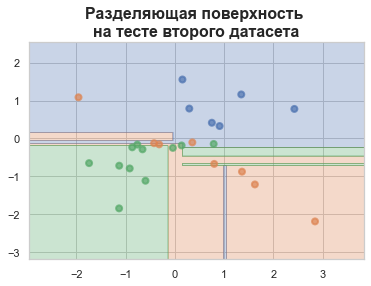

In [227]:

plot_surface(clf, X_test3, y_test3)
test_pred3 = clf.predict(X_test3)
print("Accuracy на тесте второго датасета равно", accuracy_score(y_test3, test_pred3))
plt.title("Разделяющая поверхность \nна тесте второго датасета", fontsize=16, fontweight = 'bold');

__Ответ:__ Деревья переобучиваются, accuracy на трейнах всех дата сетов 100%, на тесте падате, особенно сильно падает на 2 последних - на 12 и 20 %

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [273]:
def search_hyper_parametres(df):
    X, y  = df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    depths = [None, 2, 10, 20, 50]
    leafs = [1, 2, 7, 10]
    plt.figure(figsize=(5*len(leafs), 4*len(depths)))
    count=0
    best_accuracy = 0
    best_leaf, best_depth = leafs[0], depths[0]
    for depth in depths:
        for leaf in leafs:
            tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf).fit(X_train,
                                                                                      y_train)
            accuracy = accuracy_score(y_val, tree.predict(X_val))
            if accuracy >= best_accuracy:
                best_accuracy = accuracy
                best_leaf, best_depth = leaf, depth
            plt.subplot(len(depths), len(leafs), count+1)
            plt.title('Leaf {} Depth {} Train {:.2f} Test {:.2f}'.format(leaf, depth,
                                                                accuracy_score(y_train, tree.predict(X_train)), 
                                                                accuracy_score(y_test, tree.predict(X_test))), fontweight='bold')
            plot_surface(tree, X_test, y_test)
            count += 1
    print('Best min_samples_leaf', best_leaf, 'Best max_depth', best_depth)
    plt.show()
    return best_leaf, best_depth
    

Dataset circles
Best min_samples_leaf 2 Best max_depth 50


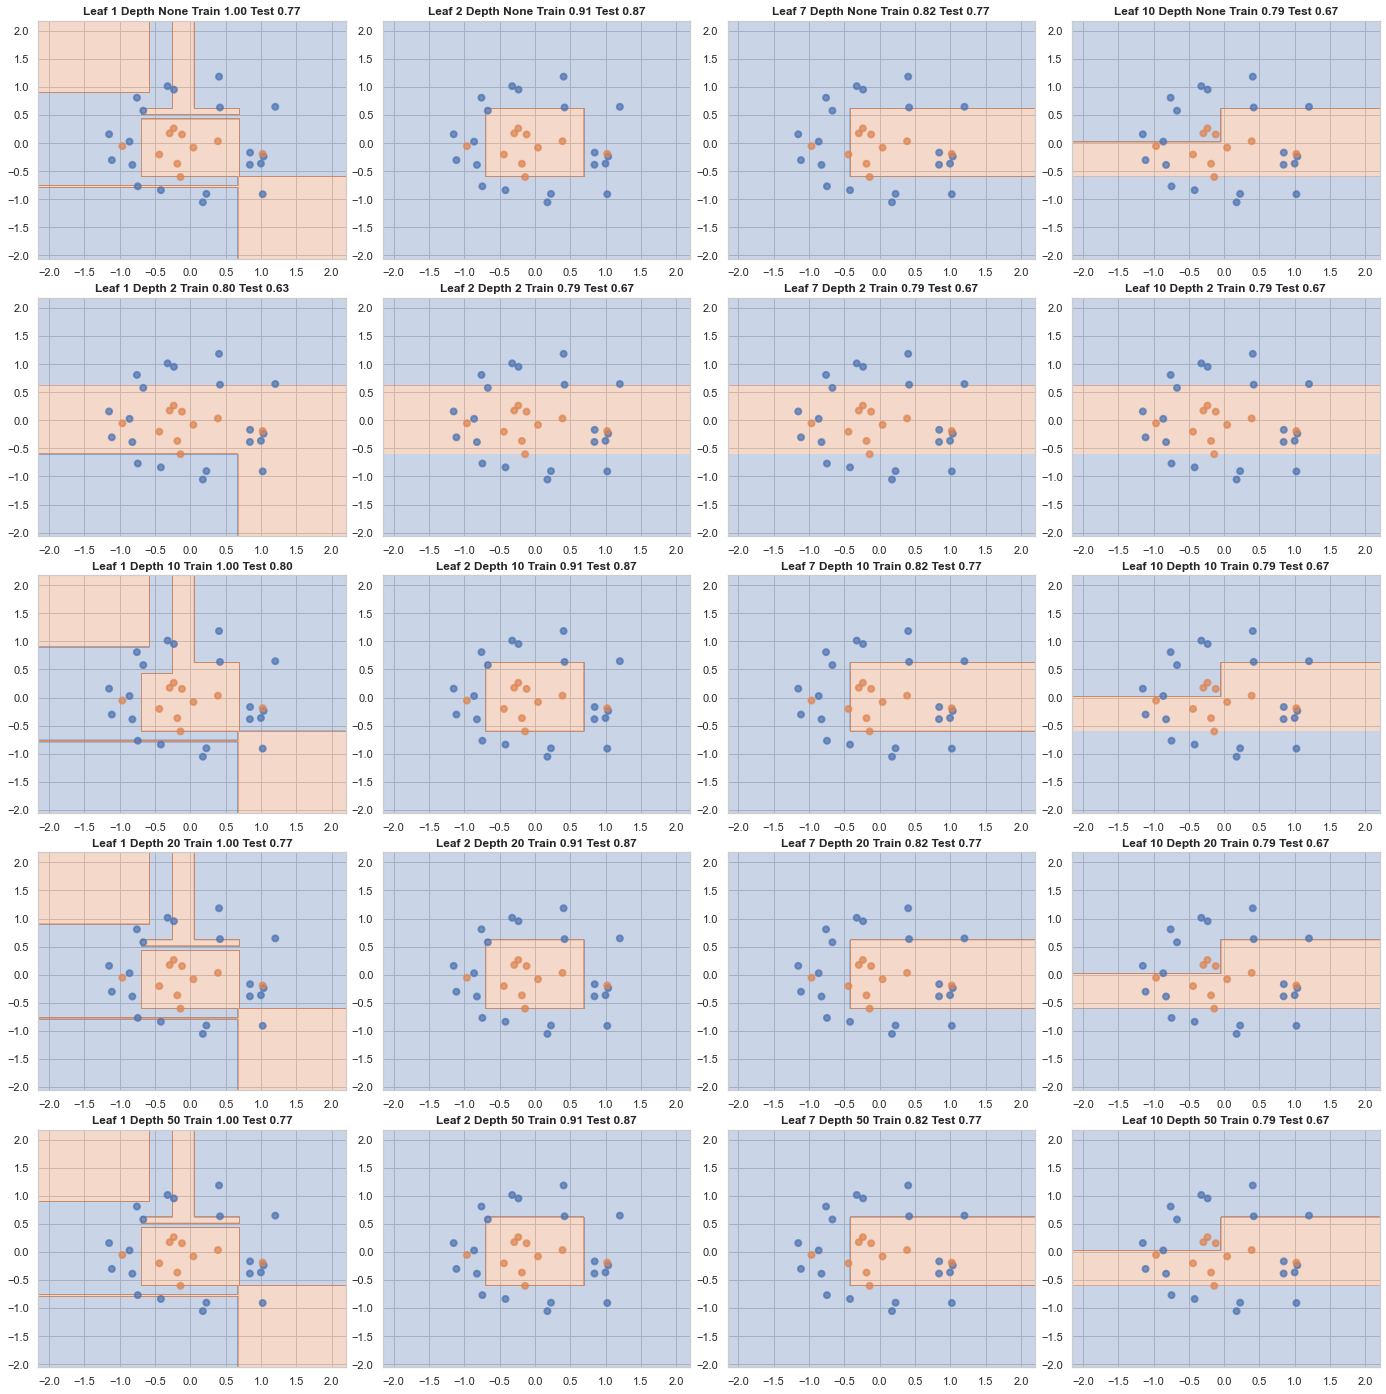

Dataset moons
Best min_samples_leaf 2 Best max_depth 50


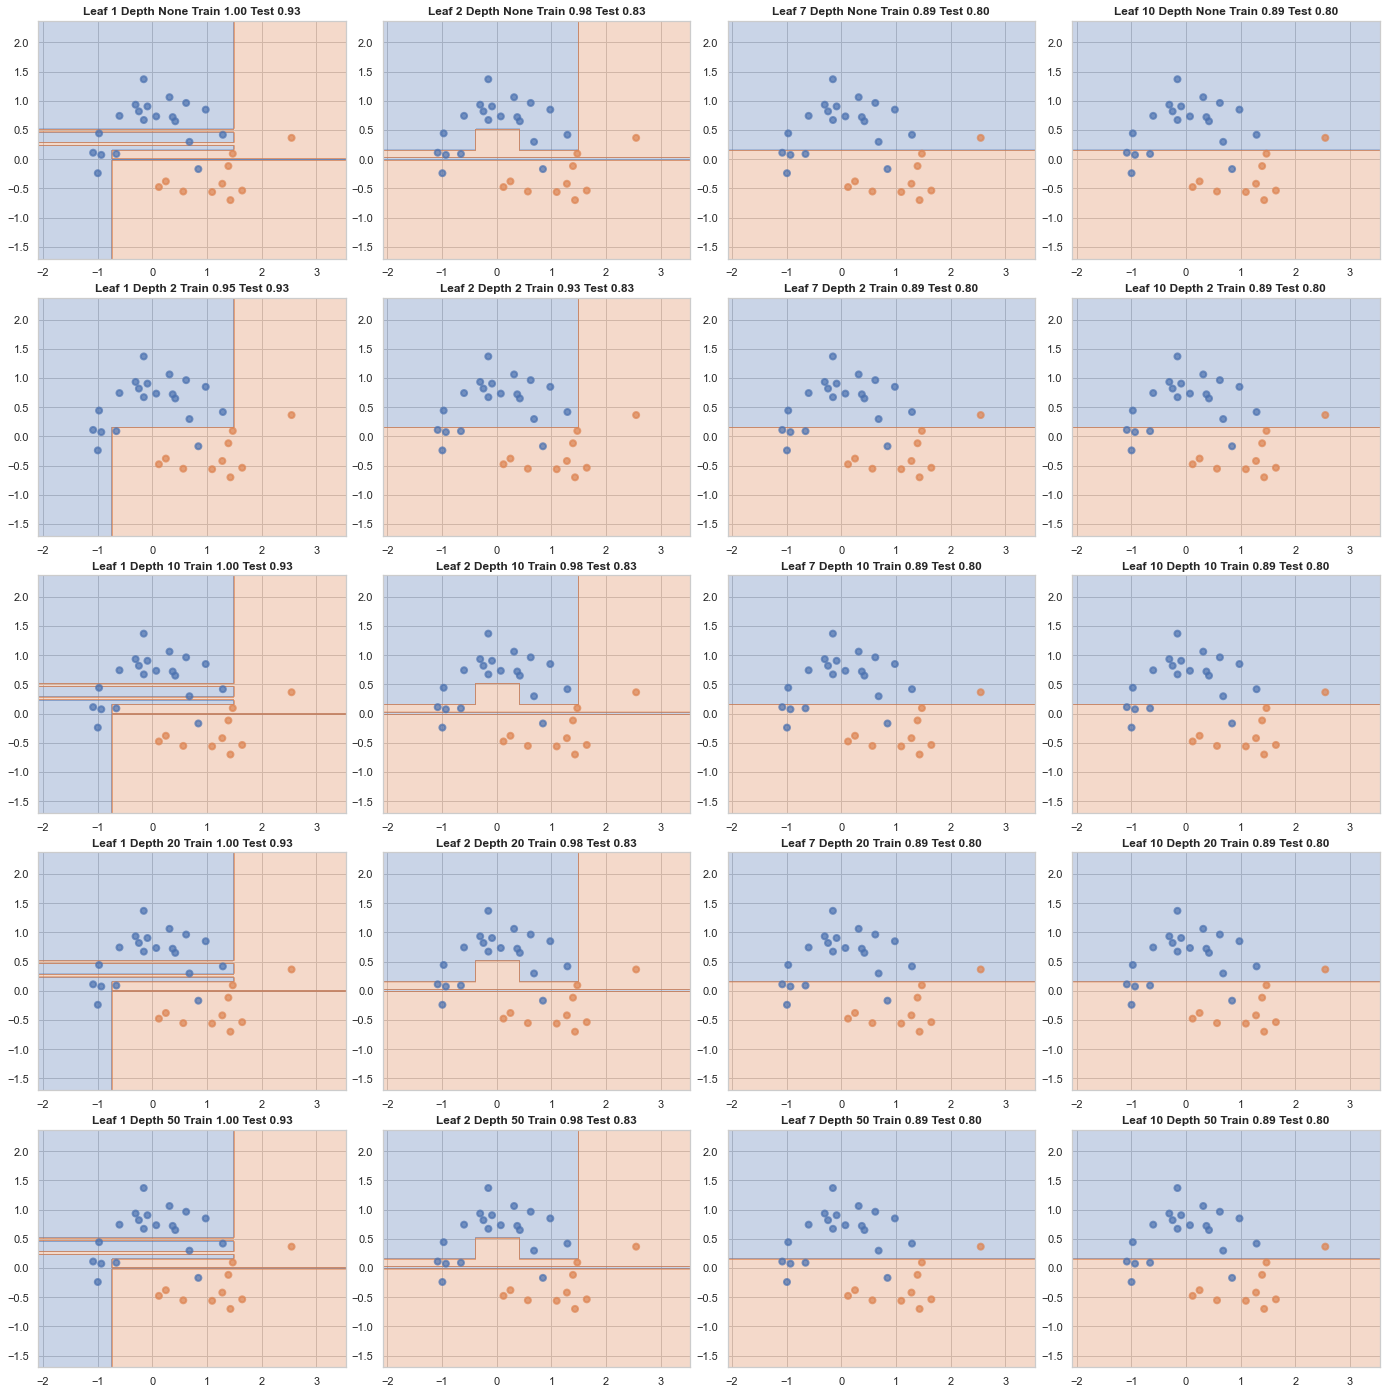

Dataset classification
Best min_samples_leaf 1 Best max_depth 50


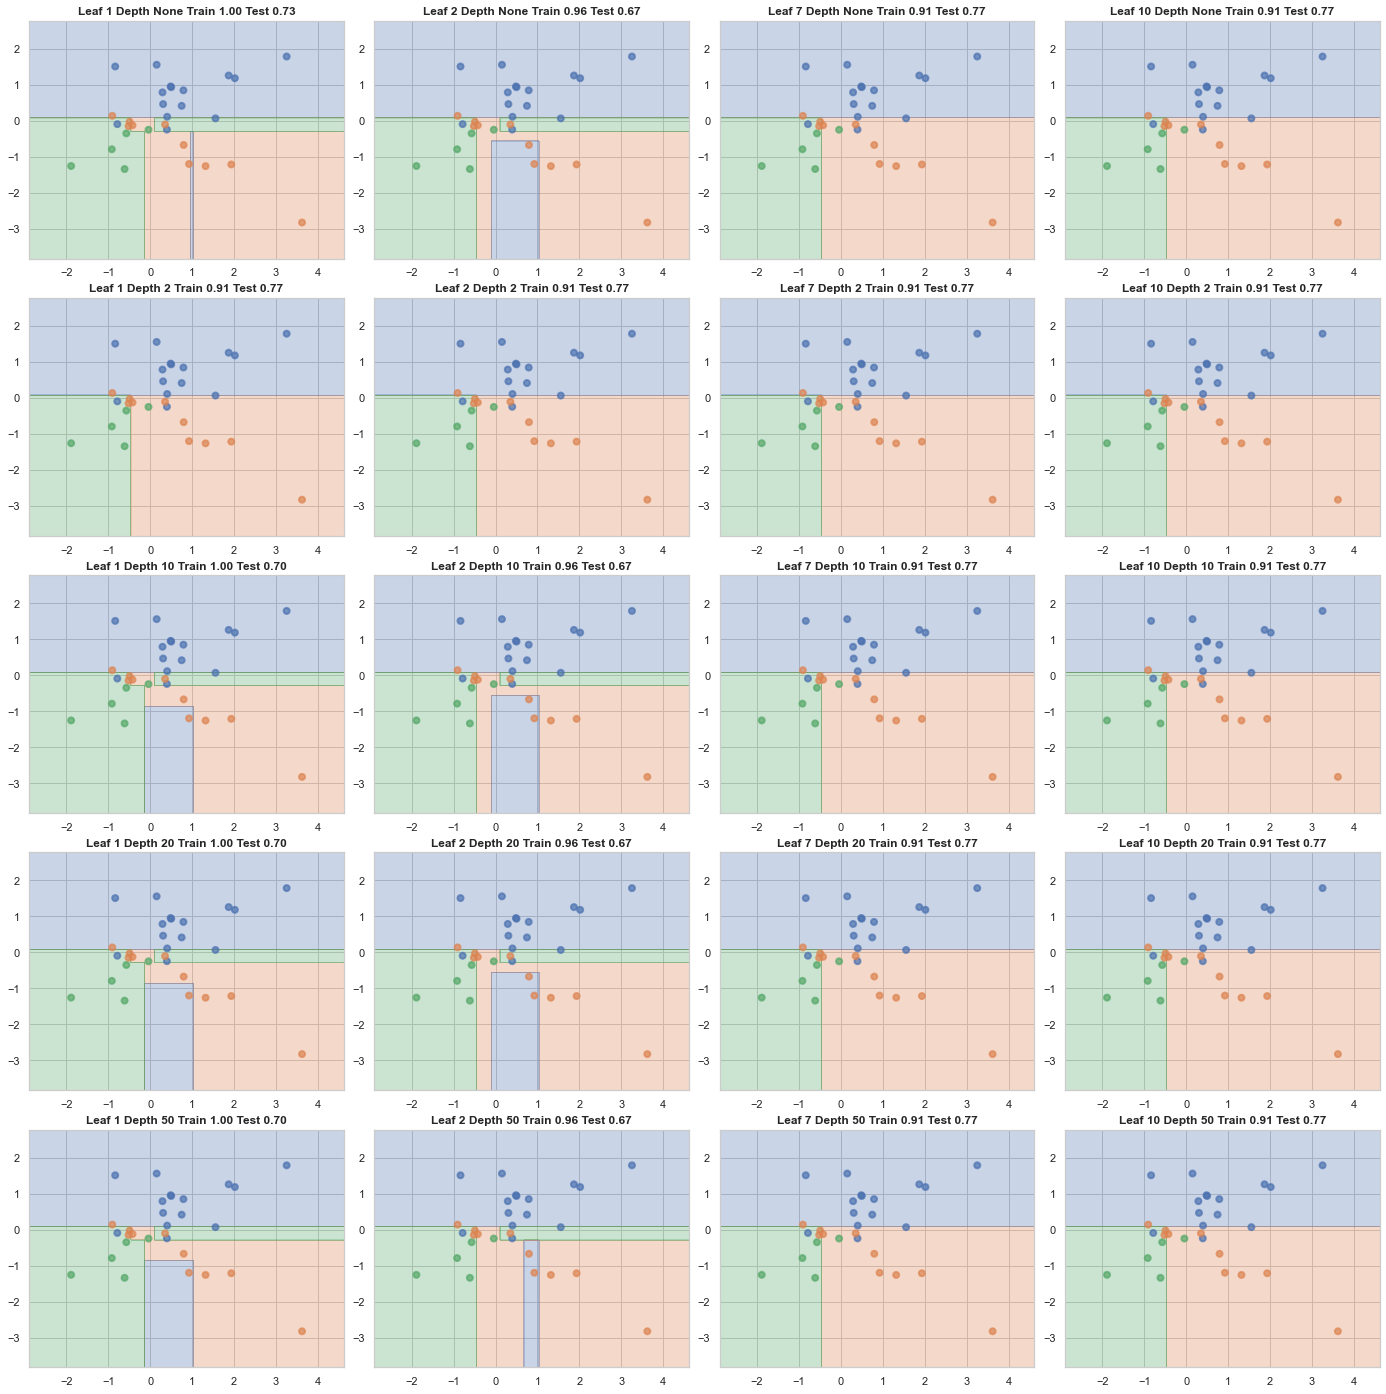

circles (2, 50)
moons (2, 50)
classification (1, 50)


In [274]:
names = ['circles', 'moons', 'classification']
best_params = []
for i, dataset in enumerate(datasets):
    print('Dataset', names[i])
    best_params.append(search_hyper_parametres(dataset))
for i in range(3):
    print(names[i], best_params[i])

При увеличении глубины и уменьшении  min_samples_leaf качество растет на трейне. В случае увеличения глубины это и српаведливо на тесте, однако до опредлеенного значения.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [229]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
%autoreload 2

import numpy as np
from hw5code import find_best_split, DecisionTree

[Ссылка на посылку](https://contest.yandex.ru/contest/56884/problems/A/)
__НИК__ ezstashevski

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [231]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


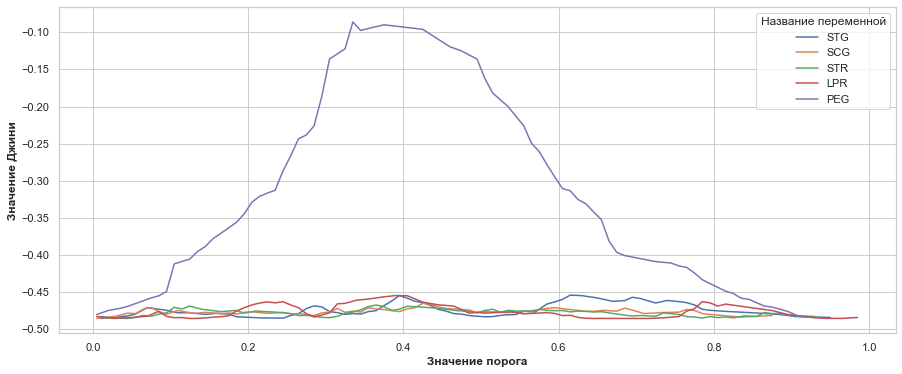

In [232]:
fig, ax = plt.subplots(figsize=(15, 6))


for feature in ['STG', 'SCG', 'STR', 'LPR', 'PEG']:
    thresholds, ginis, _, _ = find_best_split(np.array(df[feature]), np.array(df['UNS']))
    plt.plot(thresholds, ginis)
    
plt.legend(title = 'Название переменной' , labels =df.columns[:-1])
plt.xlabel('Значение порога', fontsize=12, fontweight="bold")
plt.ylabel('Значение Джини', fontsize=12, fontweight="bold")
plt.show()

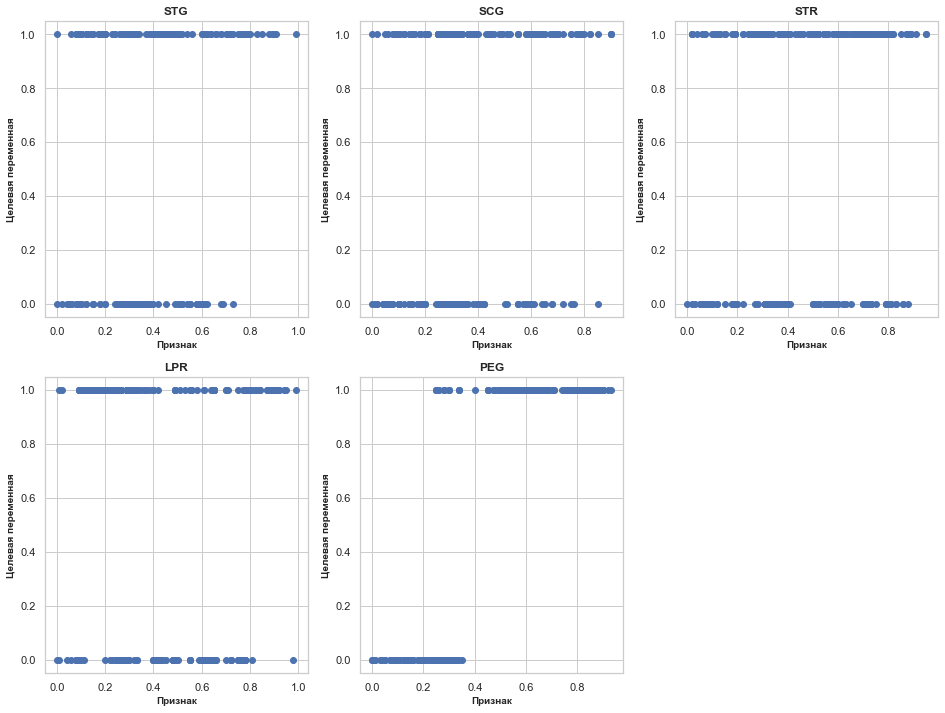

In [233]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[feature], df['UNS'])
    plt.title(feature,fontsize=12, fontweight="bold" )
    plt.xlabel('Признак' , fontsize=10, fontweight="bold")
    plt.ylabel('Целевая переменная', fontsize=10, fontweight="bold")
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

__Ответ__ : Из первого графика видно, что самой большой коэффициент Джини у признака `PEG`. Для этого признака также очень хорошее разделение на скаттерплотах. В идеальном случае Джини наомниает график нормального распределения - холм по середине, как видно другие переменные не выполняют этого условия - их кривые слабо штормит.
`PEG` - The exam performance of user for goal objects,то есть условно оценка за экзамен, в то время как таргет - The knowledge level of user. Логично, что наибольший вес в таком таргете скорее будет экзамен.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

[Ссылка](https://contest.yandex.ru/contest/56884/problems/B/),  ник ezstashevski

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [25]:
urls = [
    'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
]
data = [pd.read_csv(url) for url in urls]

In [234]:
mushrooms = data[0]
tictac = data[1]
car = data[2]
nursery = data[3]
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [235]:
encoder = LabelEncoder()
encoder.fit(mushrooms['p'])
y = encoder.transform(mushrooms['p'])
x = None
for column in mushrooms.columns[1:]:
    encoder.fit(mushrooms[column])
    transformed = encoder.transform(mushrooms[column])
    if x is None:
        x = transformed
    else:
        x = np.vstack((x, transformed))
x = x.T

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [237]:
feature_types = ['categorical'] * x.shape[1]
decision_tree = DecisionTree(feature_types)
decision_tree.fit(np.array(x_train), y_train)
pred = decision_tree.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print(accuracy)

1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [259]:
def transform(df, target, target_positive, target_negative):
    y = df[target]
    for name in target_positive:
        y[y==name] = 1
    for name in target_negative:
        y[y==name] = 0
    y = y.astype(int)
    encoder = LabelEncoder()
    encoder.fit(mushrooms['p'])
    x=None
    for col in df.columns:
        if col==target:
            continue
        encoder.fit(df[col])
        transformed = encoder.transform(df[col])
        if x is None:
            x = transformed
        else:
            x = np.vstack((x, transformed))
    x = x.T
    return x, y

In [260]:
dfs = {}
dfs['mushrooms'] = transform(mushrooms, 'p', ['e'], ['p'])
dfs['tic-tac-toe'] = transform(tictac, 'positive', ['positive'], ['negative'])
dfs['car'] = transform(car, 'unacc', ['good', 'vgood'], ['unacc', 'acc'])
dfs['nursery'] = transform(nursery, 'recommend', ['very_recom', 'priority', 'spec_prior'],
                ['not_recom','recommend'])

In [261]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator

def perform_experiment(x, y, number):
    if number == 1:
        features = ['real'] * x.shape[1]
    elif number == 2:
        features = ['categorical'] * x.shape[1]
    elif number == 3:
        enc = OneHotEncoder(sparse=False)
        enc.fit(x)
        x = enc.transform(x)
        features = ['real'] * x.shape[1]
    if number < 4:
        decision_tree = DecisionTree(features)
        accuracy = cross_val_score(dtree, np.array(x), np.array(y), cv=10, scoring=make_scorer(accuracy_score))
    else:
        decision_tree= DecisionTreeClassifier()
        accuracy = cross_val_score(dtree, x, y, cv=10, scoring=make_scorer(accuracy_score))
    return np.mean(accuracy)
   

        
    return np.mean(accuracy)

In [262]:
results = pd.DataFrame(columns=[1, 2, 3, 4])
for number in range(1, 5):
    for name in dfs.keys():
        x, y = dfs[name]
        results.loc[name, number] = perform_experiment(x, y, number)

In [263]:
results

,1,2,3,4
mushrooms,0.961984,0.95829,0.956566,0.961984
tic-tac-toe,0.754857,0.789243,0.803717,0.784002
car,0.944371,0.944952,0.823501,0.944371
nursery,0.999846,0.999846,0.999846,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Алгоритмы ранжируются по разному:
  - 2 лучше работает на грибах и машин
  - 1 и 4 лучше для nursery 
  - только 4 лучше для тик така

Причина - полагаю разное число признаков и категорий. Очень большое число категорий в датасете о грибах, в разы меньше в тик таке. Также в датасете грибов кажется больше редких категорий. Попробуем перемешать данные.

In [265]:
results2 = pd.DataFrame(columns=[1, 2, 3, 4])
for number in range(1, 5):
    for name in dfs.keys():
        x, y = dfs[name]
        p = np.random.permutation(len(y))
        results2.loc[name, number] = perform_experiment(x[p], y[p], number)

In [266]:
results2

,1,2,3,4
mushrooms,1.0,1.0,1.0,1.0
tic-tac-toe,0.895482,0.866228,0.951919,0.8683
car,0.993047,0.992469,0.986692,0.993628
nursery,0.999614,0.999769,0.999769,0.999614


Ага получилось - особенно стало лучше для тик така